# Arvcf: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Arvcf'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30507366,C57BL/6N,f,control,wt (Arvcf),23.2,85.86,53.62,3.02,1.39
1,30507367,C57BL/6N,f,control,wt (Arvcf),22.2,96.75,72.60,2.36,0.68
2,30507398,C57BL/6N,f,control,wt (Arvcf),25.4,92.91,63.67,2.60,0.89
3,30507433,C57BL/6N,f,control,wt (Arvcf),25.0,94.79,67.69,2.42,0.83
4,30507450,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99
5,30507474,C57BL/6N,f,control,wt (Arvcf),23.3,88.17,56.22,2.57,1.11
6,30507496,C57BL/6N,m,control,wt (Arvcf),27.8,90.52,59.88,2.58,1.12
7,30507499,C57BL/6N,f,control,wt (Arvcf),28.1,87.44,55.78,3.04,1.31
8,30507500,C57BL/6N,m,control,wt (Arvcf),29.2,78.93,45.73,2.70,1.46
9,30507503,C57BL/6N,m,control,wt (Arvcf),27.3,88.16,56.62,2.72,1.23


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30507450,Arvcf_1vX_134.dcm,2.827616,0.283333,0.846221,0.321667,712.871287,0.283333,0.581481,high,0.581481,high,30.273021,1.306686,95.683661,70.072993,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,-0.072384,2.863808,-0.143779,0.918110,2.073661,4.622993
1,30507450,Arvcf_1vX_134.dcm,3.075291,0.367500,1.197093,0.405000,720.000000,0.367500,0.581481,high,0.581481,high,37.183424,3.338336,91.021978,61.073826,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,0.175291,2.987645,0.207093,1.093547,-2.588022,-4.376174
2,30507450,Arvcf_1vX_134.dcm,3.137209,2.225833,1.135174,2.263333,720.000000,2.225833,0.614452,high,0.614452,high,39.033508,2.896510,92.579428,63.815789,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,0.237209,3.018605,0.145174,1.062587,-1.030572,-1.634211
3,30507450,Arvcf_1vX_134.dcm,2.662500,2.309167,0.887500,2.348333,705.882353,2.309167,0.614452,high,0.614452,high,26.097677,1.488461,94.296578,66.666667,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,-0.237500,2.781250,-0.102500,0.938750,0.686578,1.216667
4,30507450,Arvcf_1vX_134.dcm,3.034012,2.644167,1.093895,2.684167,679.245283,2.644167,0.832422,high,0.832422,high,35.977352,2.622500,92.710692,63.945578,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,0.134012,2.967006,0.103895,1.041948,-0.899308,-1.504422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,30513134,arvcf_2v2_116.dcm,2.063953,4.371667,0.804942,4.332500,666.666667,4.371667,0.998937,high,0.998937,high,13.787264,1.139125,91.737845,61.000000,C57BL/6N,f,control,wt (Arvcf),22.1,84.07,51.08,2.54,1.28,-0.476047,2.301977,-0.475058,1.042471,7.667845,9.920000
1775,30513134,arvcf_2v2_116.dcm,2.621221,4.461667,0.866860,4.409167,648.648649,4.461667,0.998937,high,0.998937,high,25.107276,1.395774,94.440760,66.929134,C57BL/6N,f,control,wt (Arvcf),22.1,84.07,51.08,2.54,1.28,0.081221,2.580610,-0.413140,1.073430,10.370760,15.849134
1776,30513134,arvcf_2v2_116.dcm,2.435465,4.554167,0.866860,4.520833,615.384615,4.554167,0.993693,high,0.993693,high,20.912479,1.395774,93.325642,64.406780,C57BL/6N,f,control,wt (Arvcf),22.1,84.07,51.08,2.54,1.28,-0.104535,2.487733,-0.413140,1.073430,9.255642,13.326780
1777,30513134,arvcf_2v2_116.dcm,2.394186,4.651667,0.784302,4.603333,679.245283,4.651667,0.993693,high,0.993693,high,20.038114,1.060558,94.707298,67.241379,C57BL/6N,f,control,wt (Arvcf),22.1,84.07,51.08,2.54,1.28,-0.145814,2.467093,-0.495698,1.032151,10.637298,16.161379


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

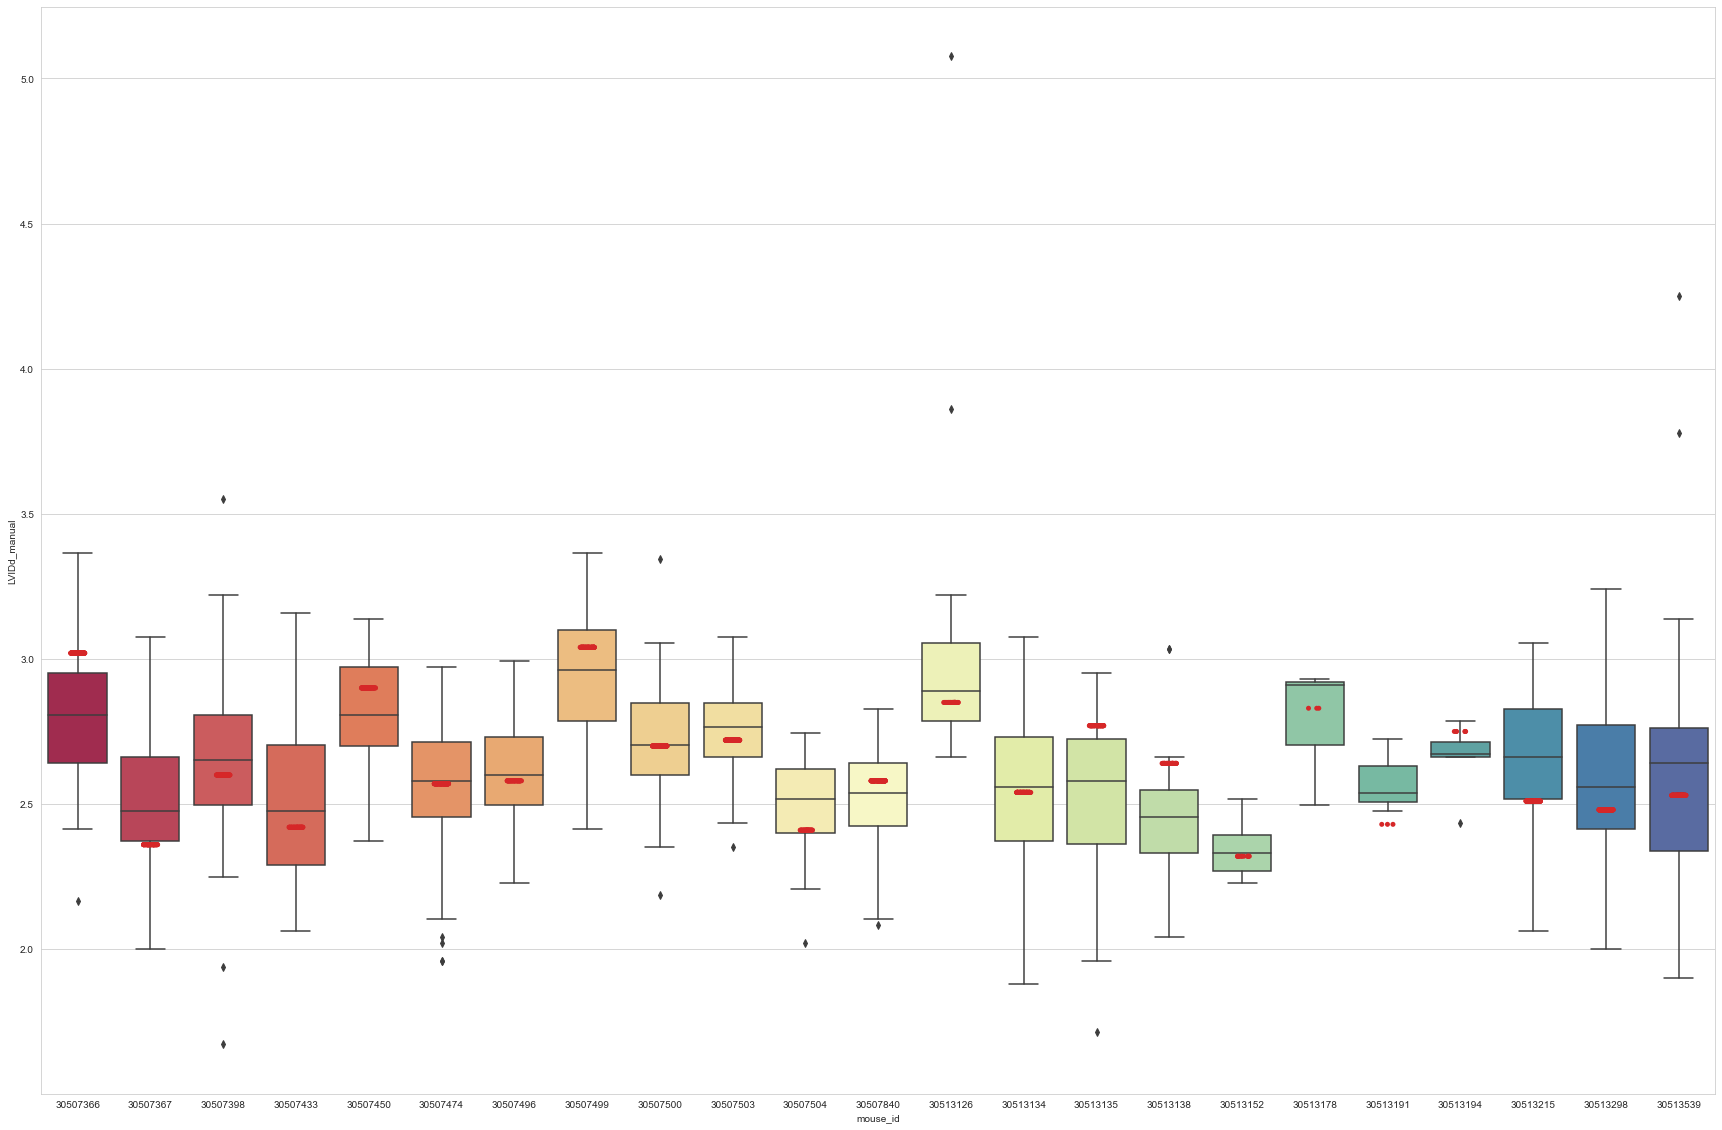

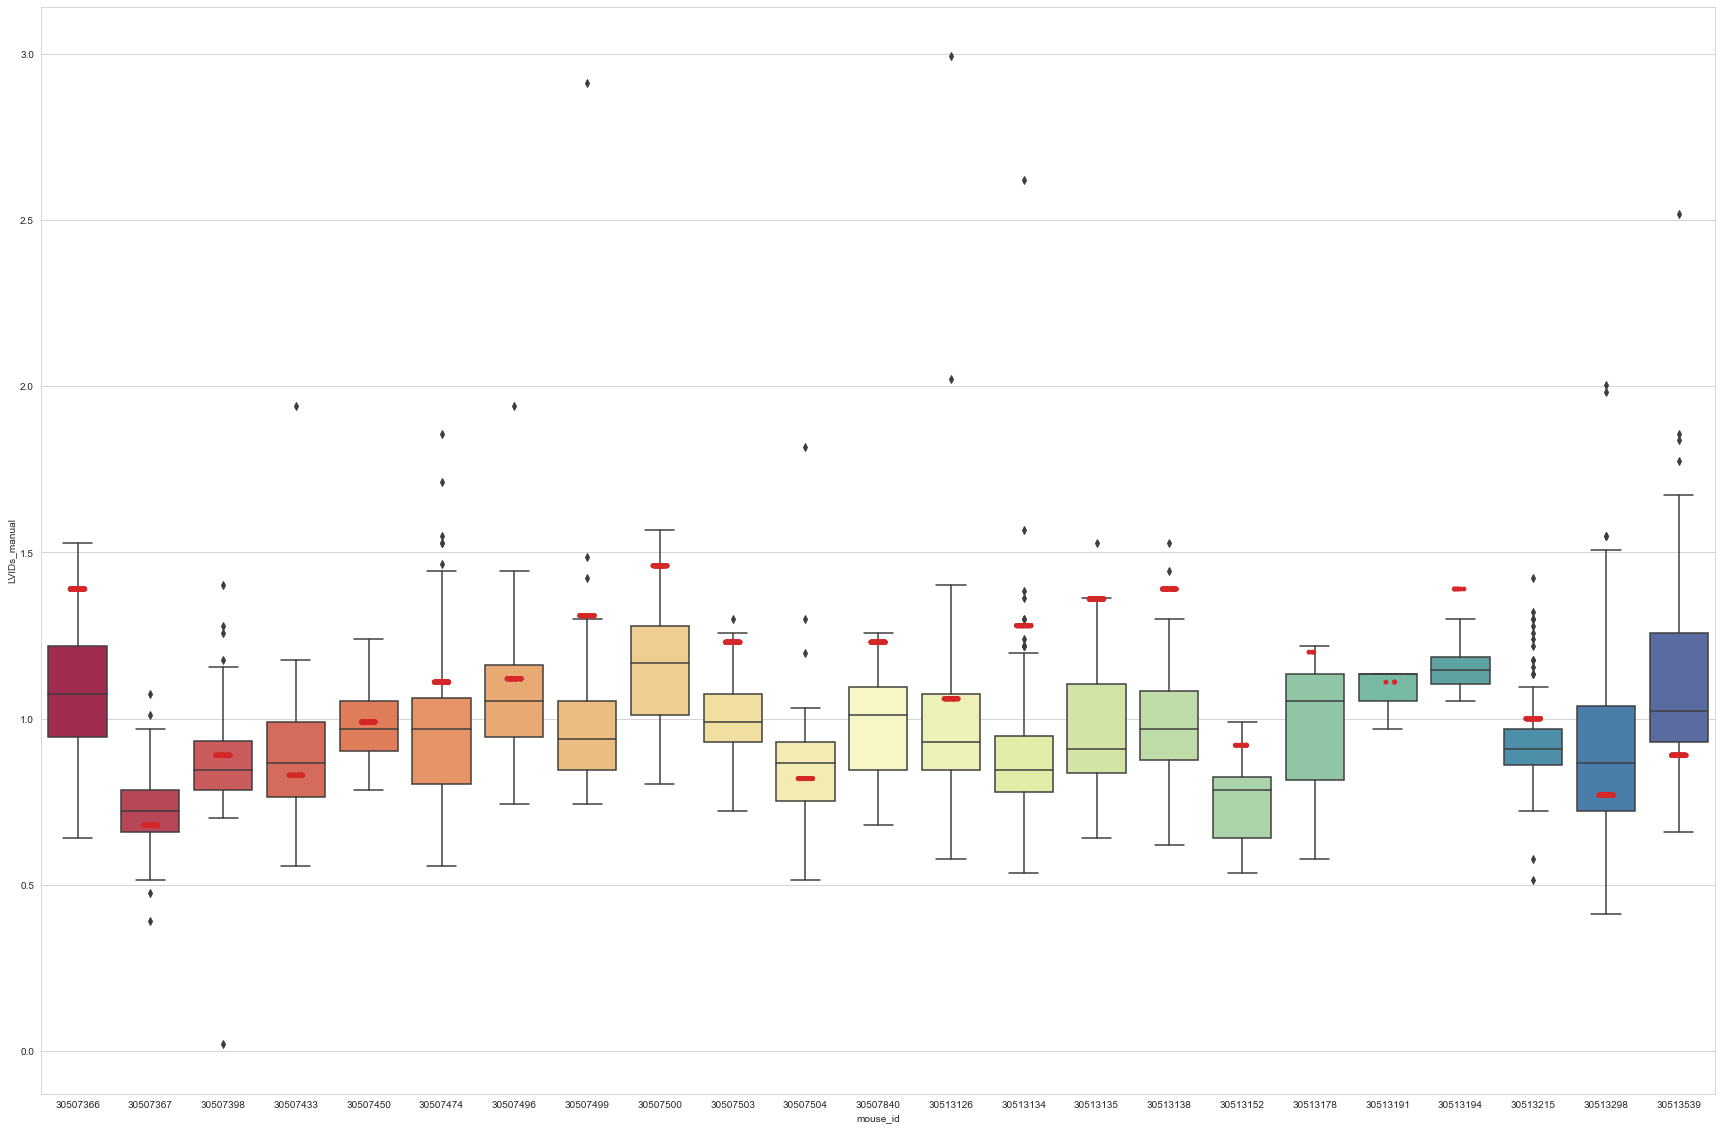

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79690/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


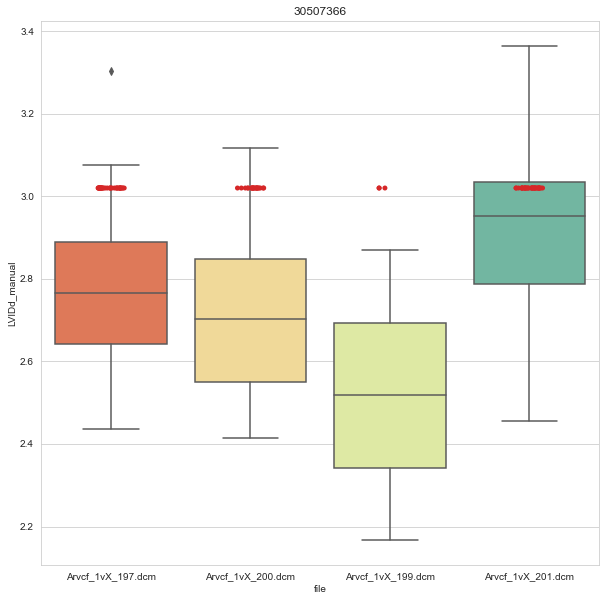

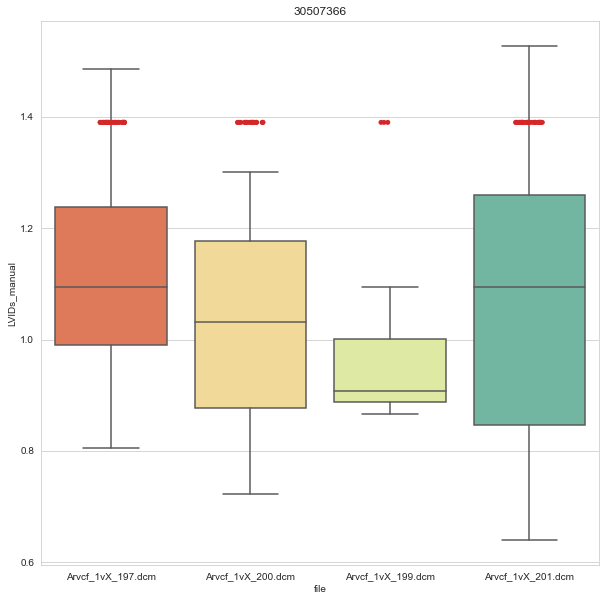

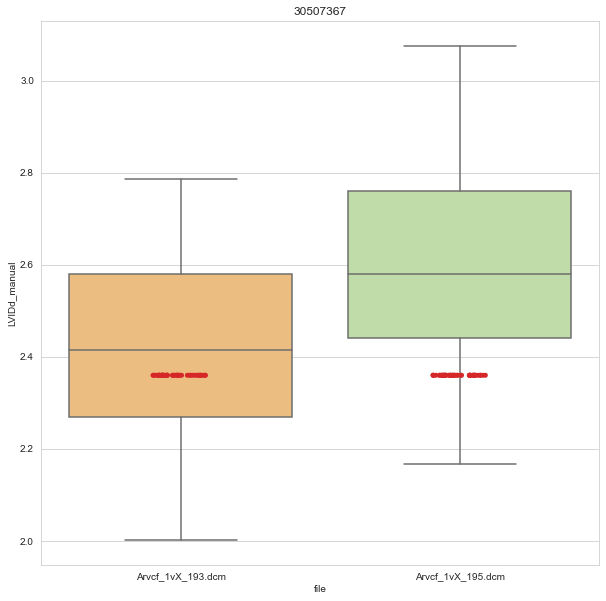

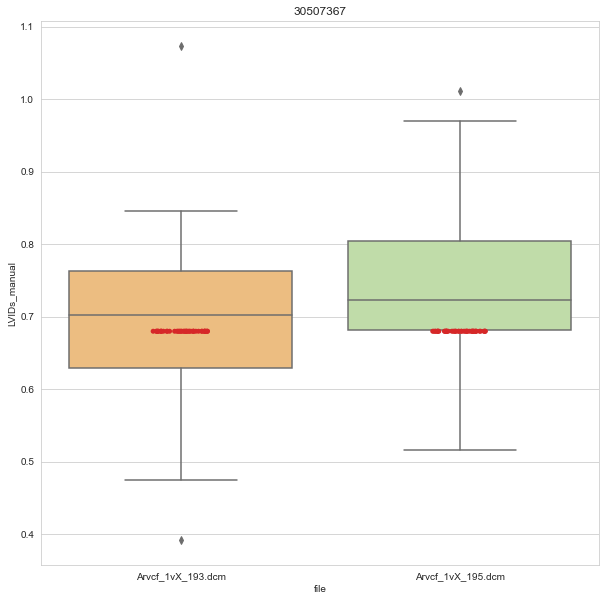

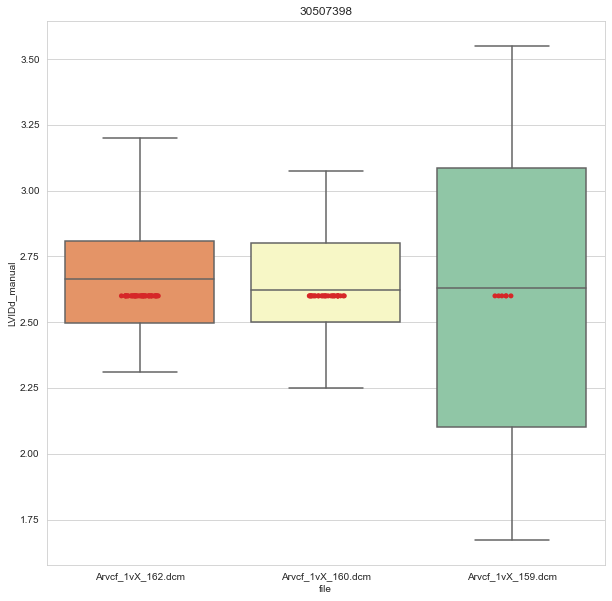

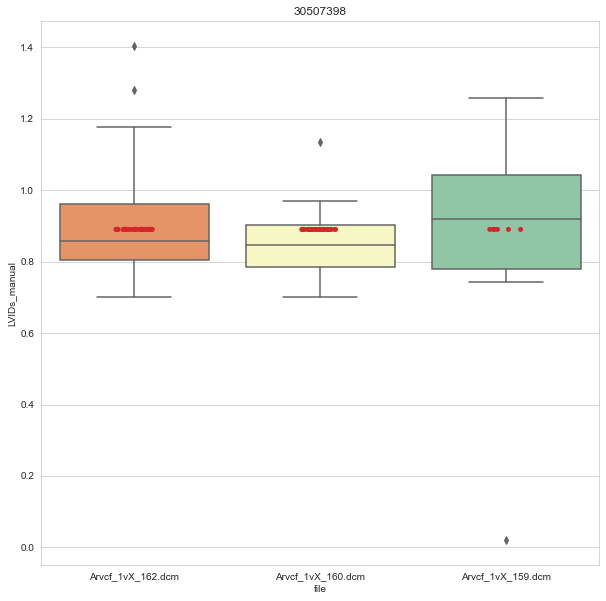

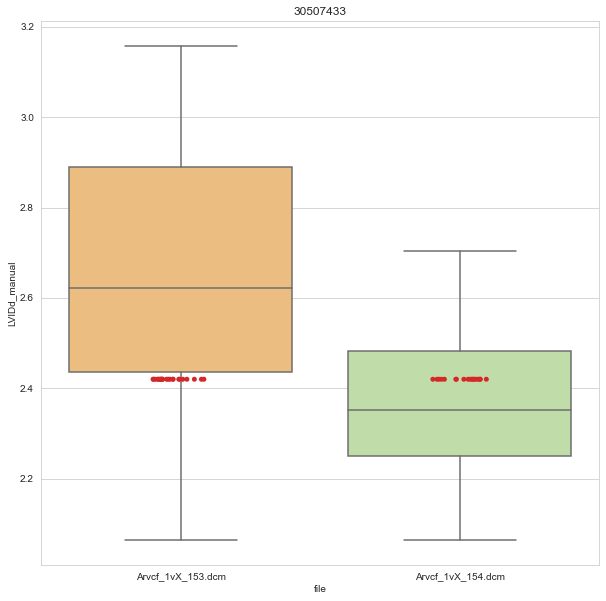

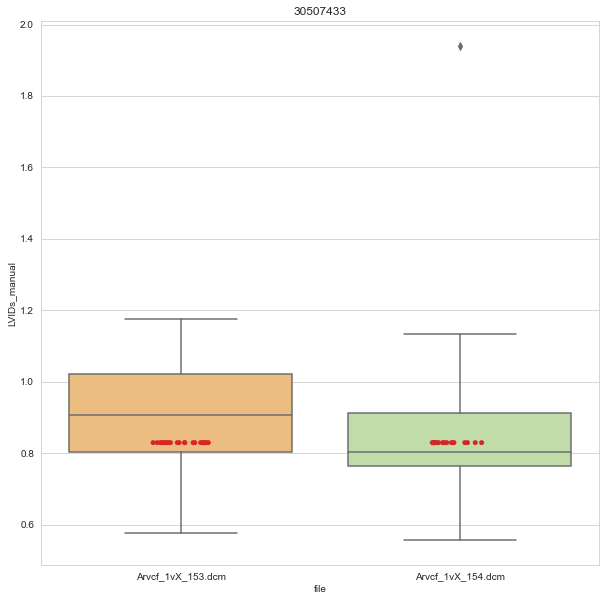

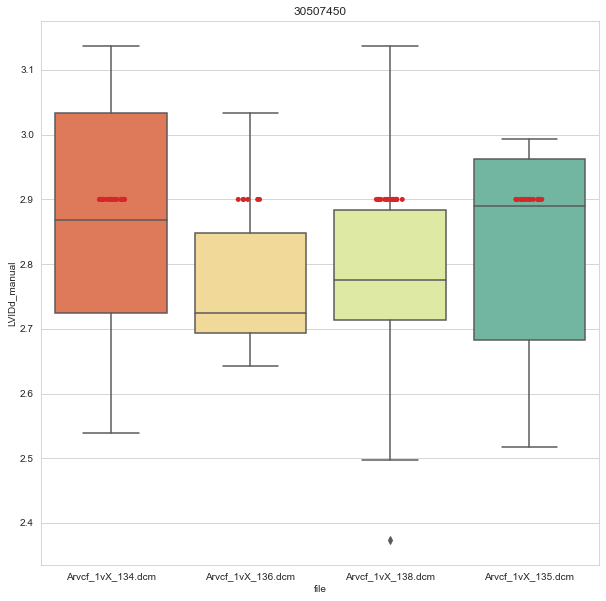

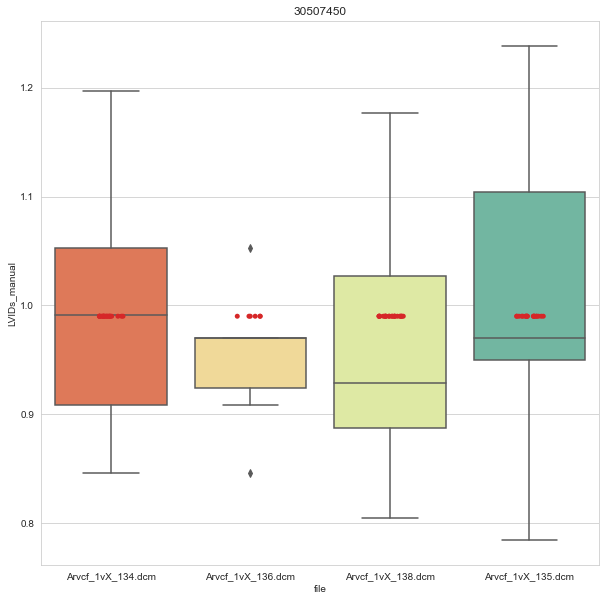

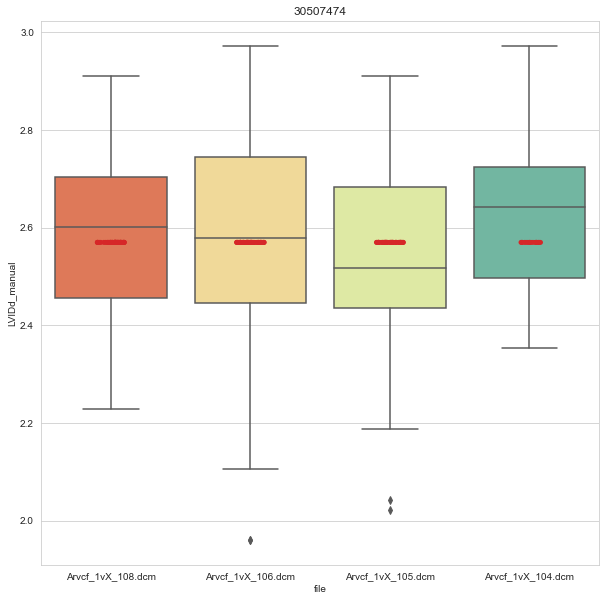

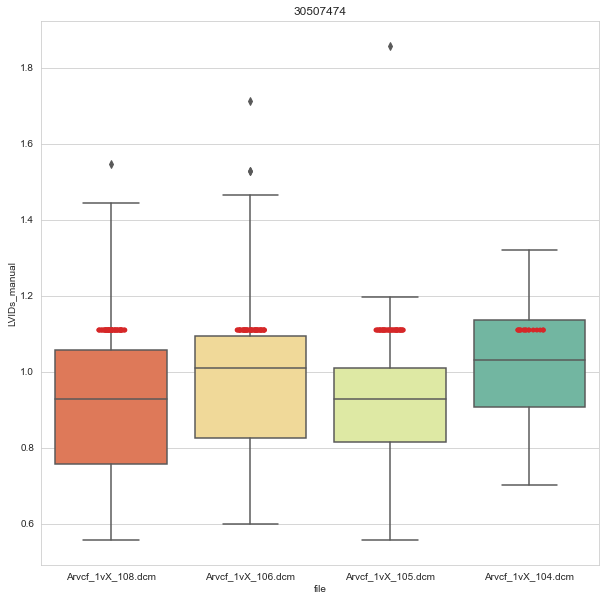

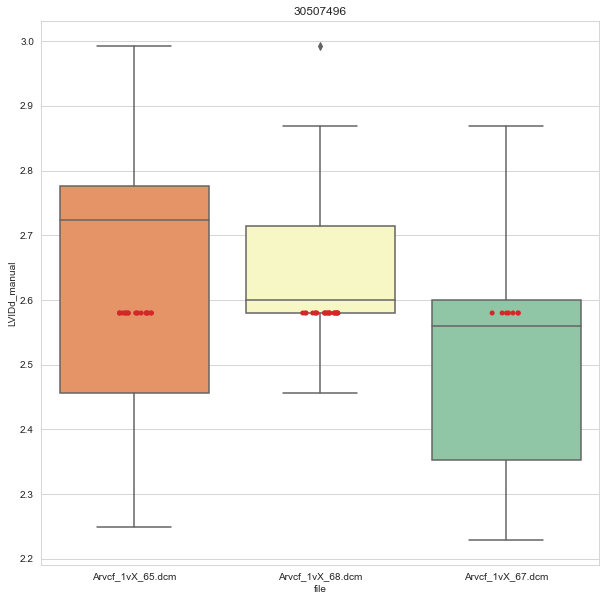

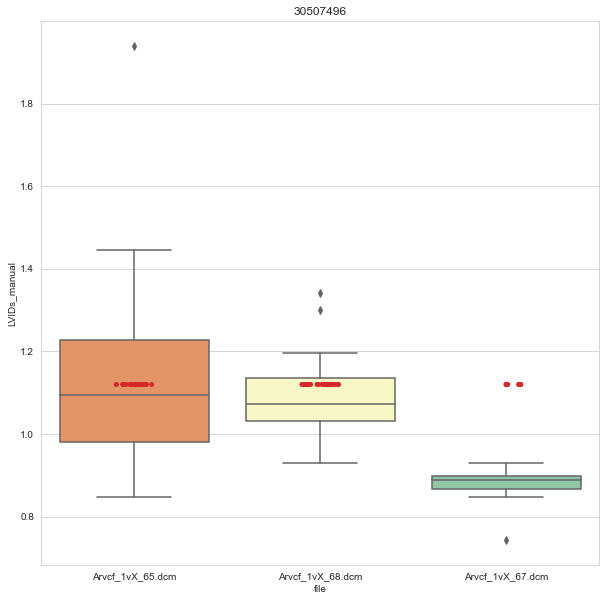

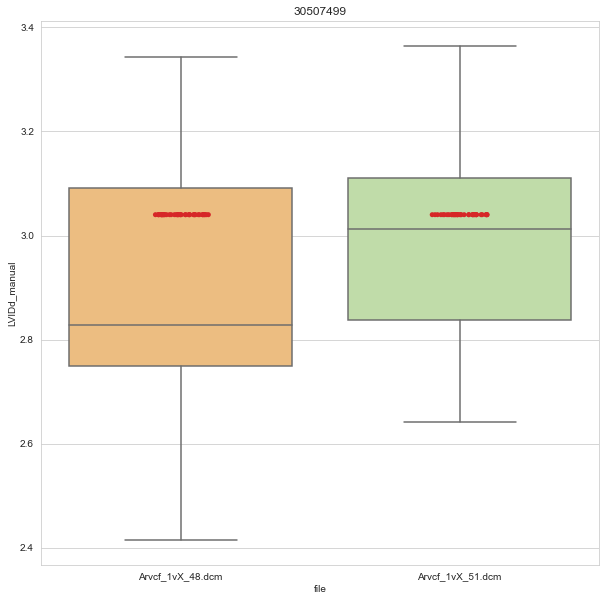

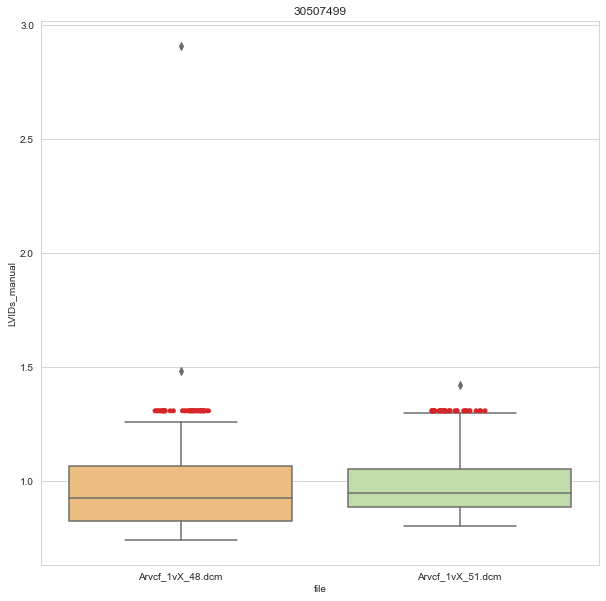

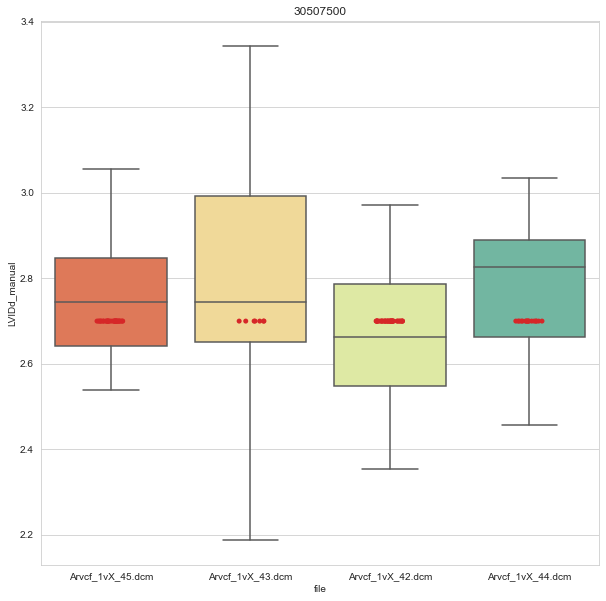

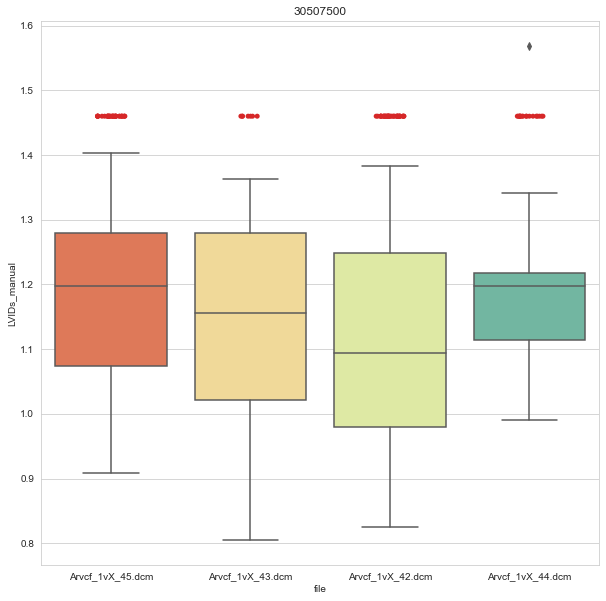

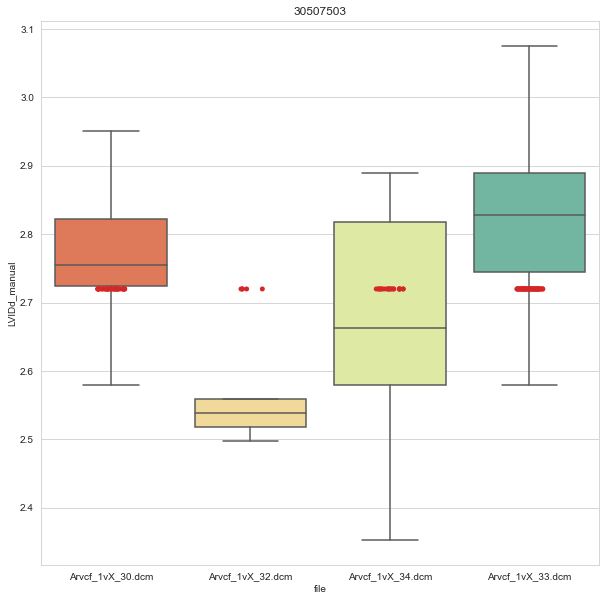

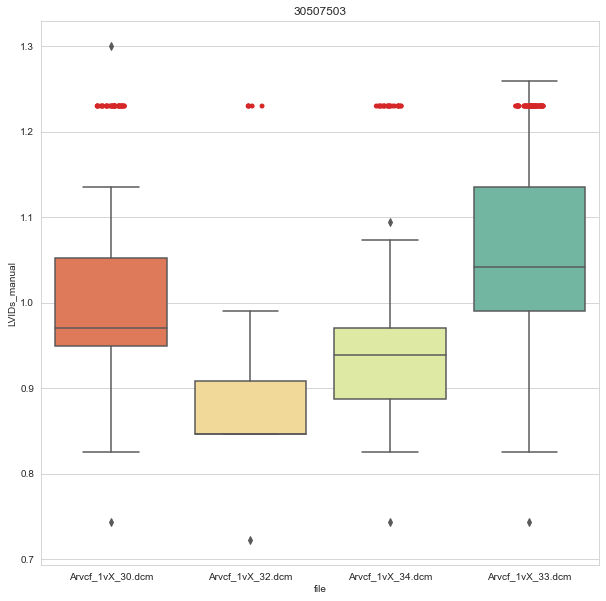

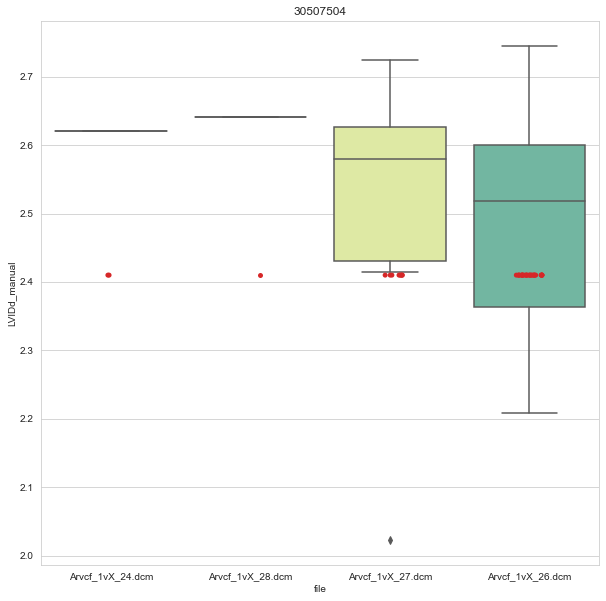

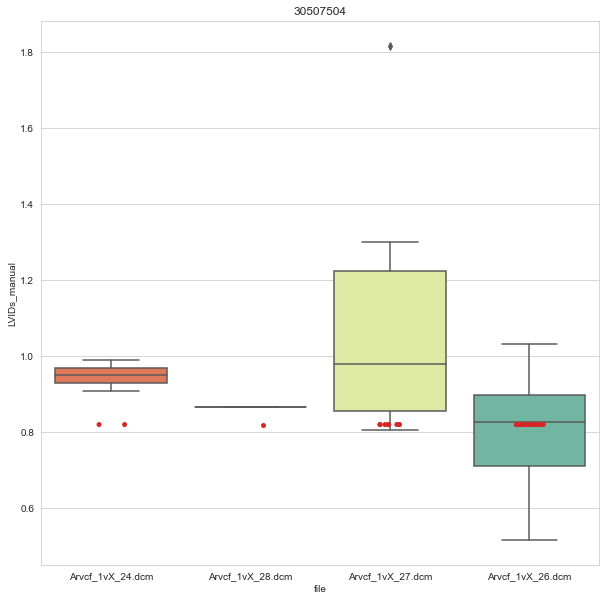

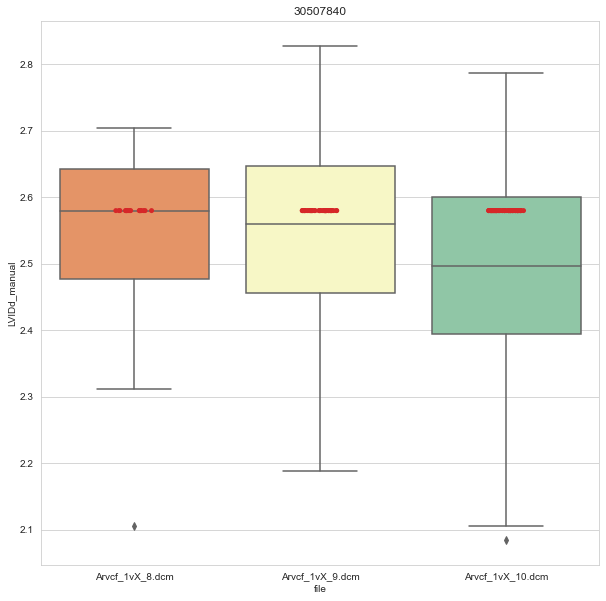

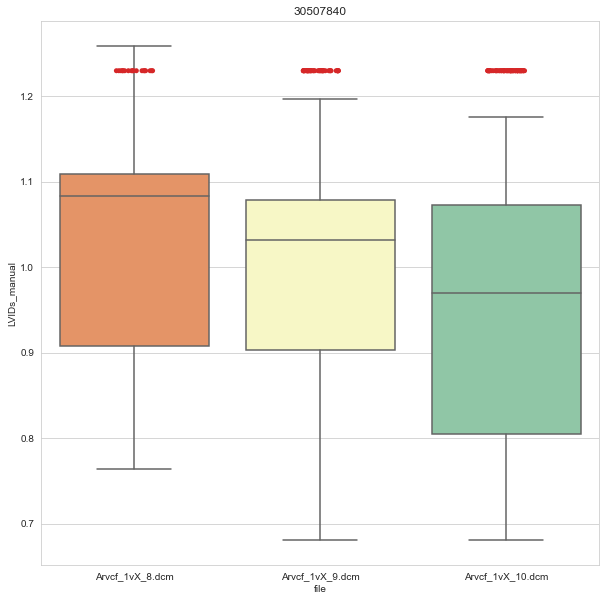

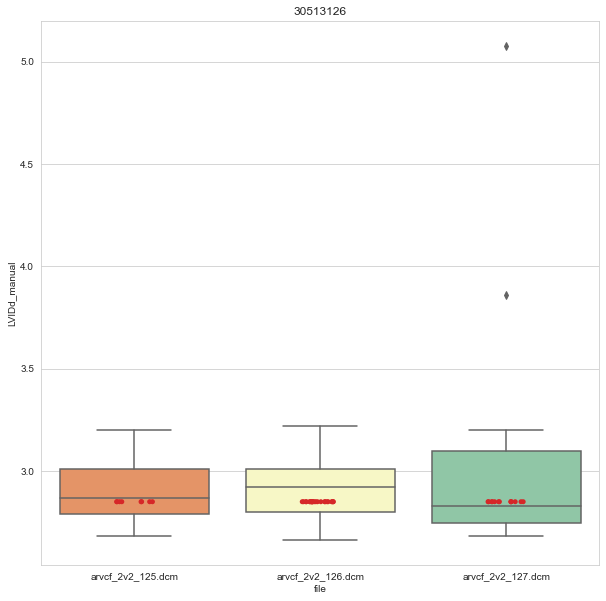

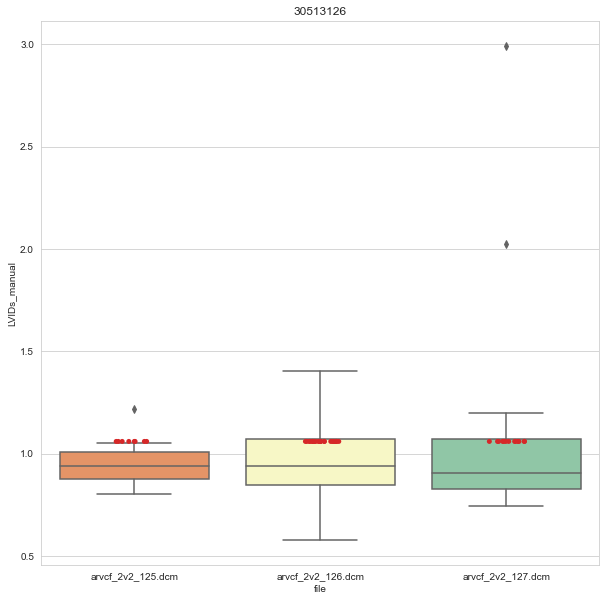

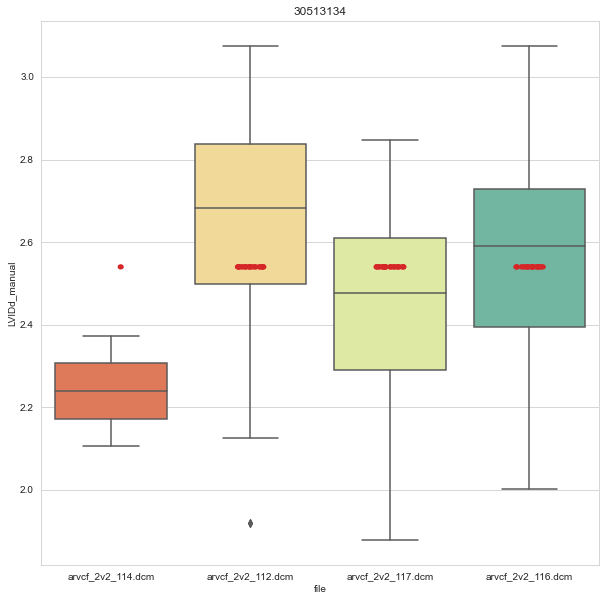

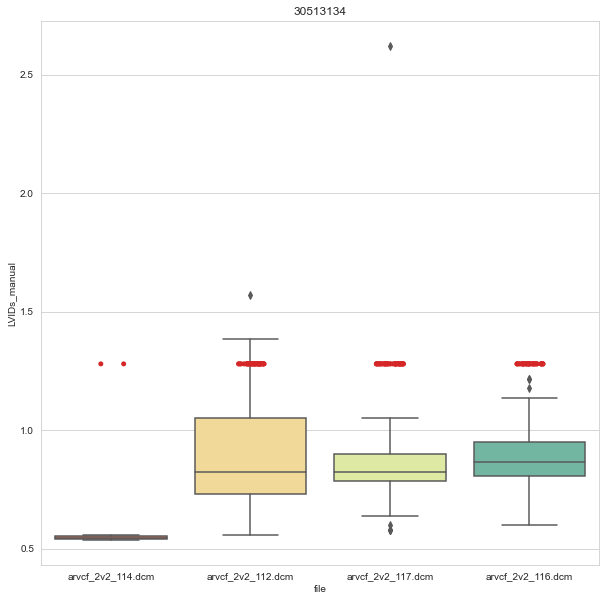

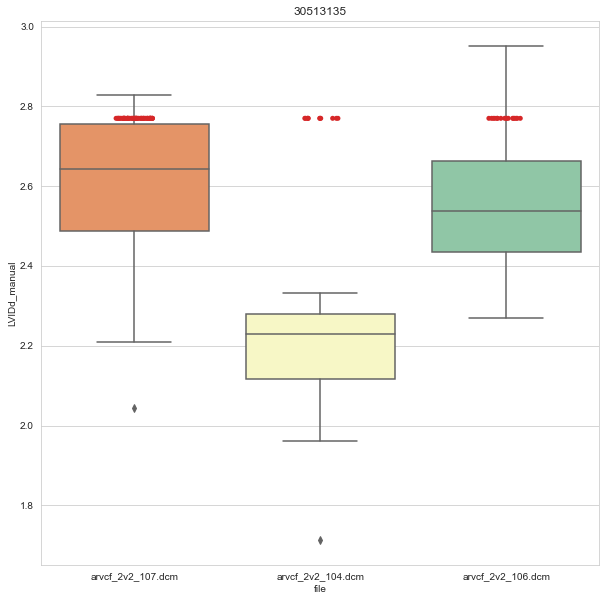

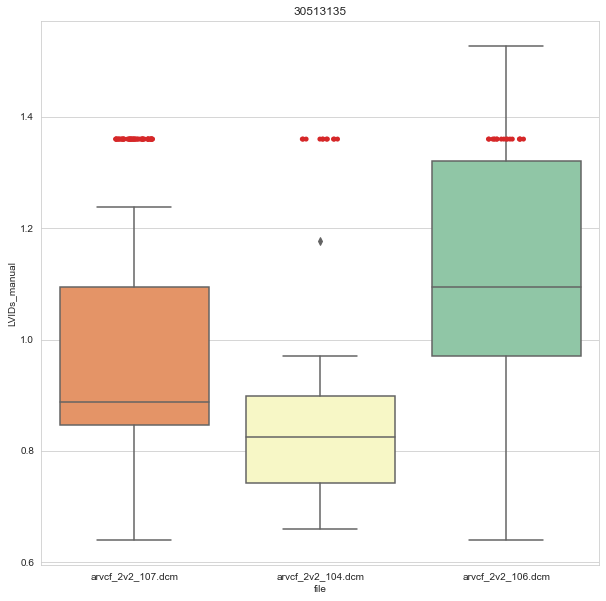

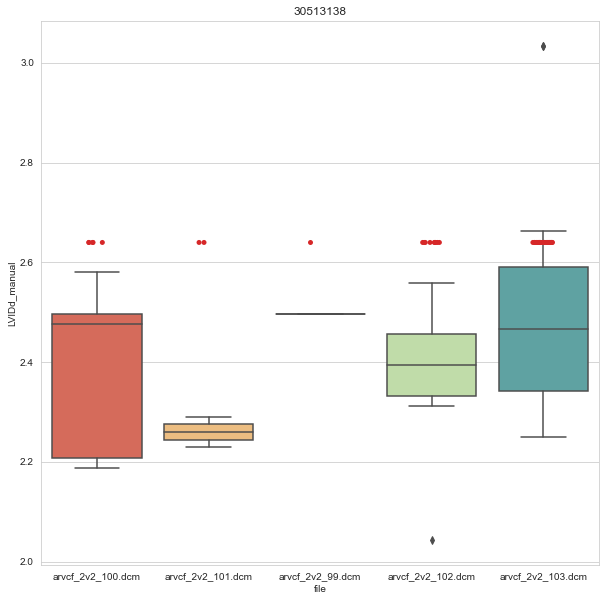

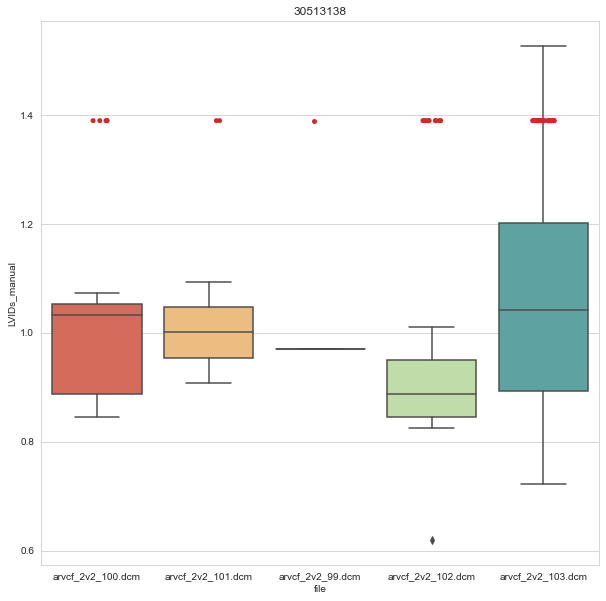

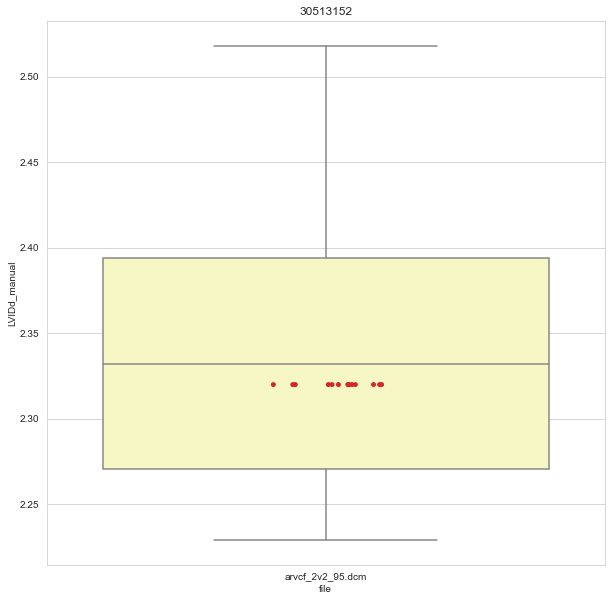

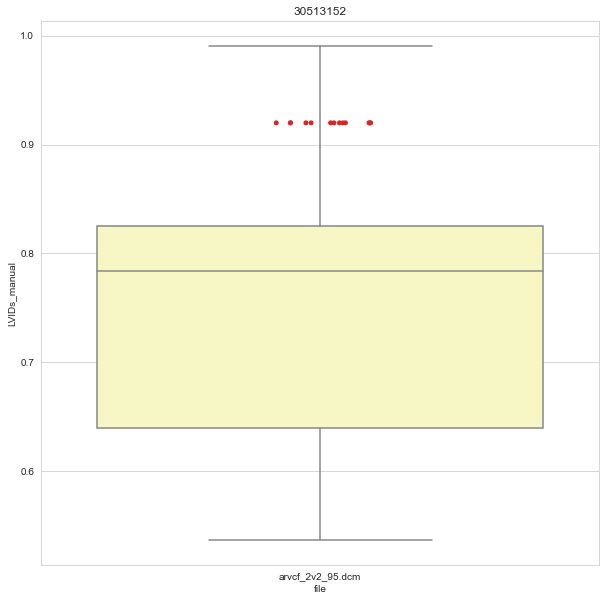

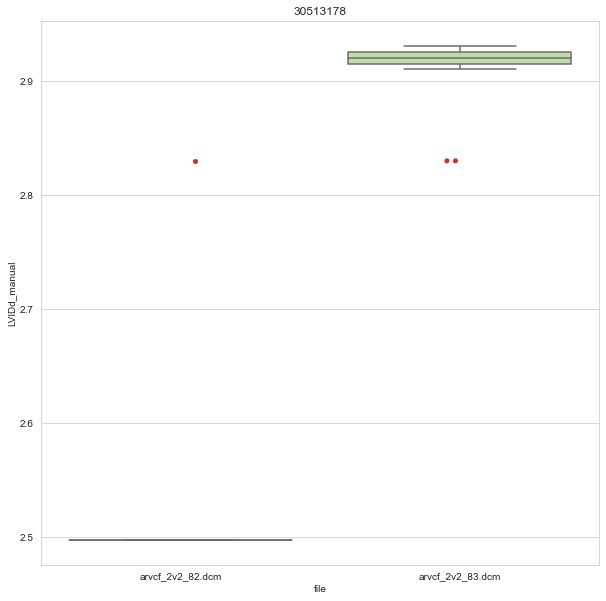

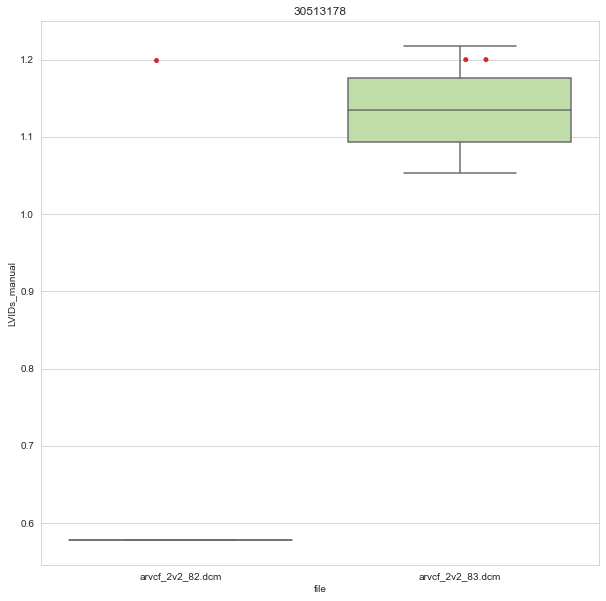

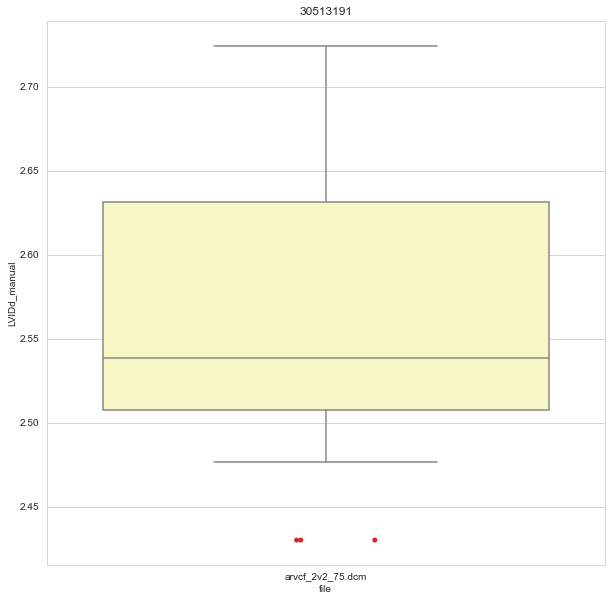

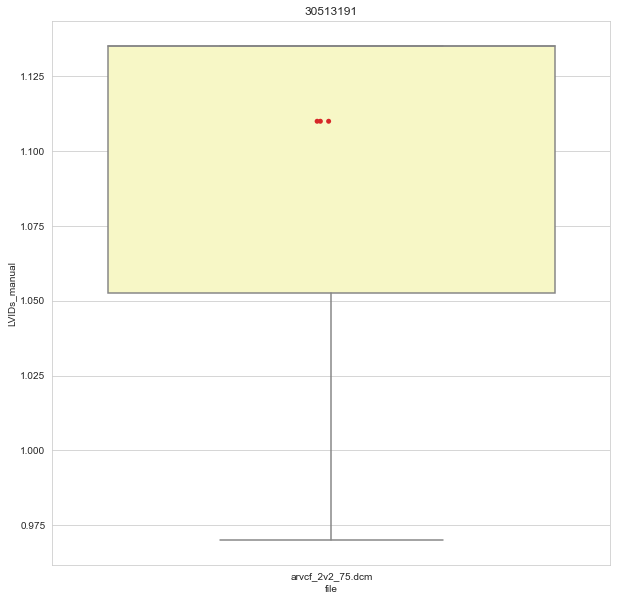

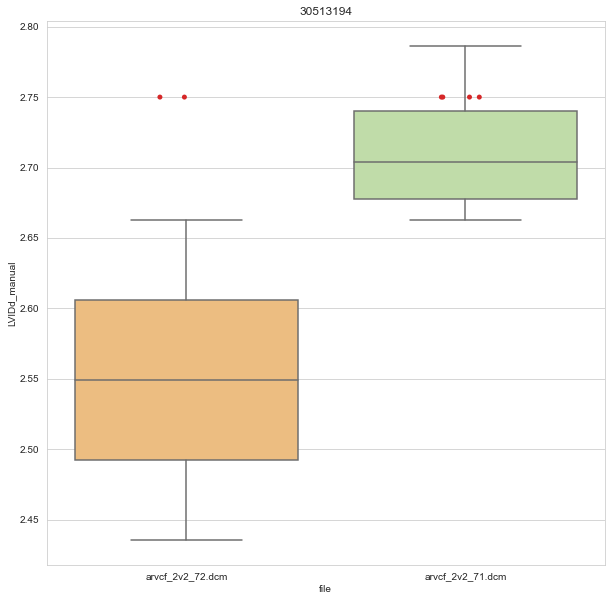

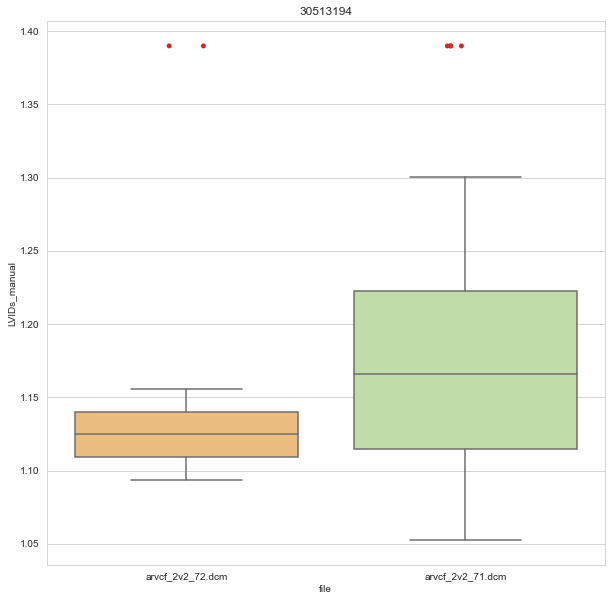

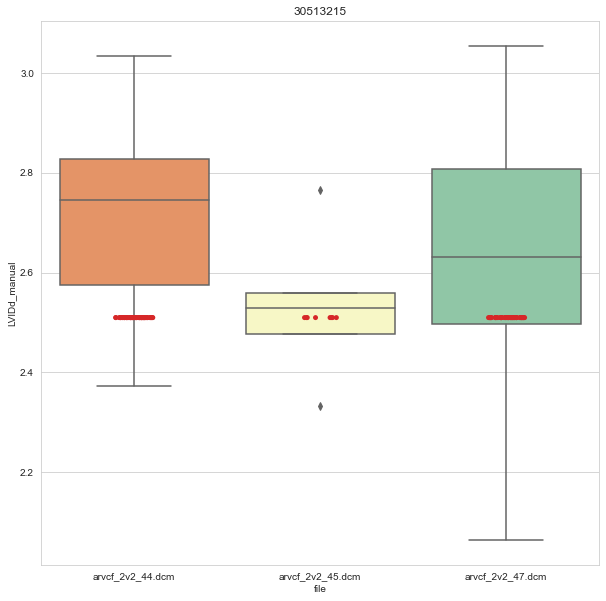

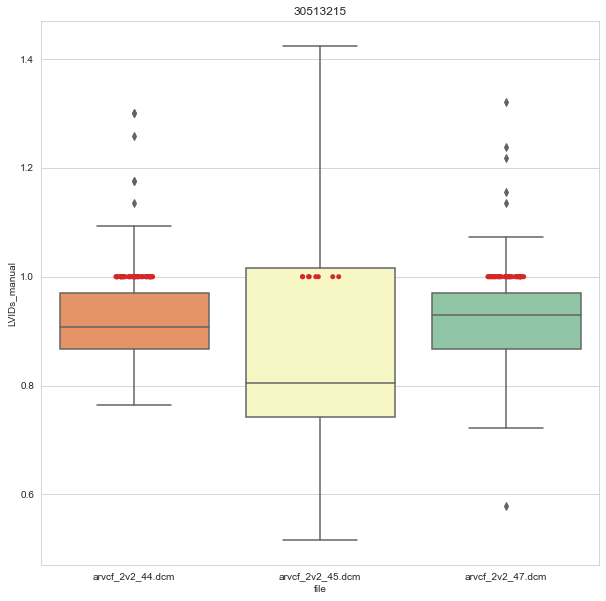

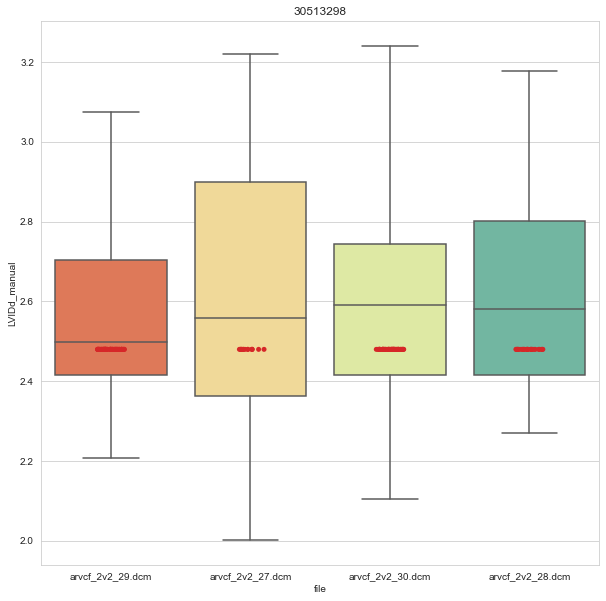

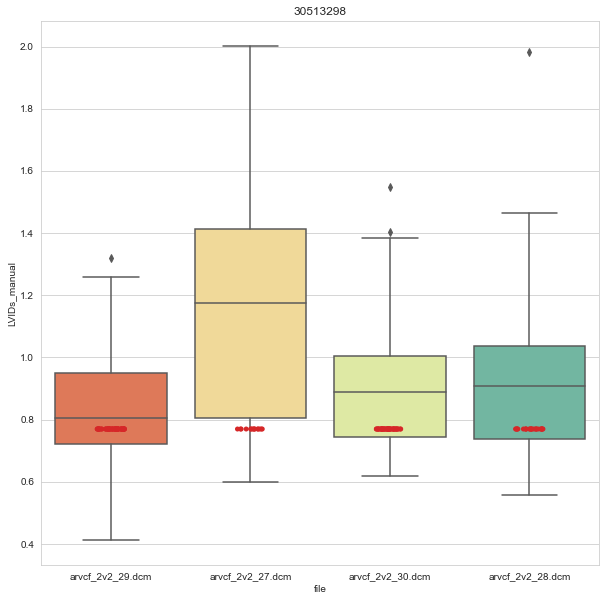

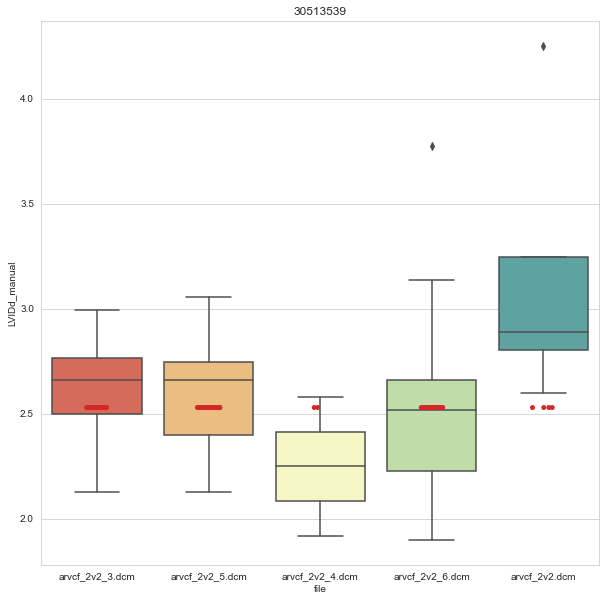

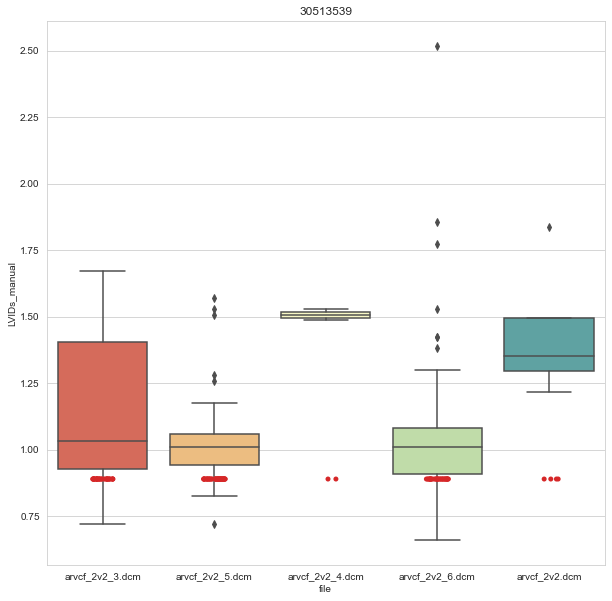

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
117,30507366,Arvcf_1vX_197,75.128469,24.871531
118,30507366,Arvcf_1vX_201,38.722730,61.277270
119,30507366,Arvcf_1vX_200,46.968140,53.031860
120,30507366,Arvcf_1vX_199,17.680315,82.319685
121,30507367,Arvcf_1vX_195,86.742035,13.257965
...,...,...,...,...
191,30513539,arvcf_2v2,13.257965,86.742035
192,30513539,arvcf_2v2_5,91.159842,8.840158
193,30513539,arvcf_2v2_3,73.479527,26.520473
194,30513539,arvcf_2v2_6,69.064748,30.935252


### Image quality per mouse

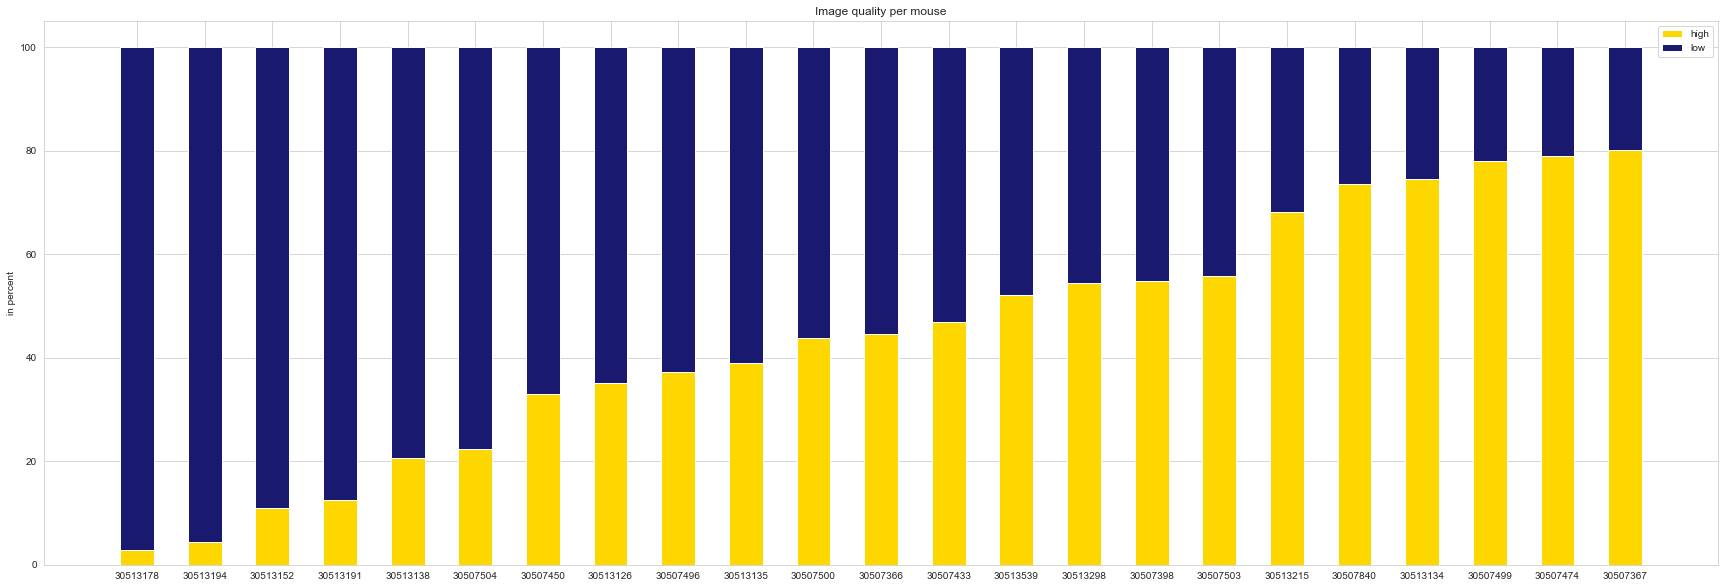

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Arvcf,44.42,55.58


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,1779.00,1779.00,1779.00,1779.00
mean,0.01,-0.13,2.90,4.96
std,0.25,0.29,7.43,9.63
min,-1.06,-0.87,-79.26,-54.11
25%,-0.13,-0.33,0.04,0.08
50%,0.01,-0.13,3.15,5.36
75%,0.16,0.01,7.12,11.01
max,2.23,1.93,16.87,35.56
number of mice,23.00,23.00,23.00,23.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,12,12
m,11,11


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')